# Iris Regression

This notebook demonstrates a simple linear regression using the Iris dataset. Sections:

- Import libraries
- Load data
- EDA (visualizations, summary)
- Prepare data (split, encoding, scaling)
- Model training
- Prediction + evaluation
- Conclusion

## 1. Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## 2. Load data

In [5]:
# Load Iris dataset and convert to a DataFrame for easy EDA
irisset = datasets.load_iris()
df = pd.DataFrame(irisset.data, columns=irisset.feature_names)
df['target'] = irisset.target
df['target_name'] = df['target'].map(dict(enumerate(irisset.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## 3. Exploratory Data Analysis (EDA)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


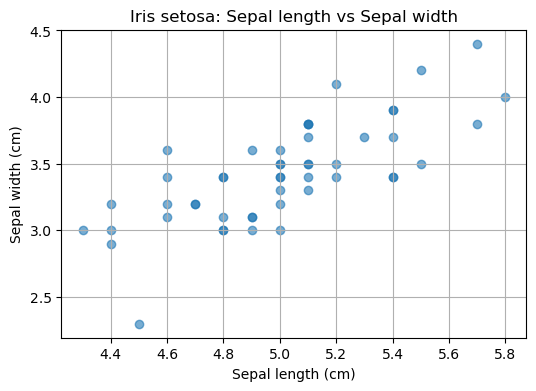

In [7]:
# Basic summary statistics and quick visualizations
print(df.describe())

# Pair a simple plot: Sepal length vs Sepal width (for first class as original code used)
plt.figure(figsize=(6,4))
plt.scatter(df.loc[df['target']==0, 'sepal length (cm)'], df.loc[df['target']==0, 'sepal width (cm)'], alpha=0.6)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris setosa: Sepal length vs Sepal width')
plt.grid(True)
plt.show()

## 4. Prepare data (split, scaling if needed)

In [9]:
# We'll replicate the original code's choice: use first 50 samples (Iris setosa)
X = irisset.data[:50, 0:1]   # Sepal length (single feature)
y = irisset.data[:50, 1]     # Sepal width (target)

# Train/test split so we can evaluate generalization (even with small set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 40 Test size: 10


## 5. Model training

In [11]:
reg = LinearRegression().fit(X_train, y_train)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [0.77536909]
Intercept: -0.4534759857970472


## 6. Prediction + evaluation

In [18]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('Train MSE =', round(mse_train, 4))
print('Train R2 =', round(r2_train, 4))
print('Test MSE =', round(mse_test, 4))
print('Test R2 =', round(r2_test, 4))

Train MSE = 0.0623
Train R2 = 0.5633
Test MSE = 0.0668
Test R2 = 0.494


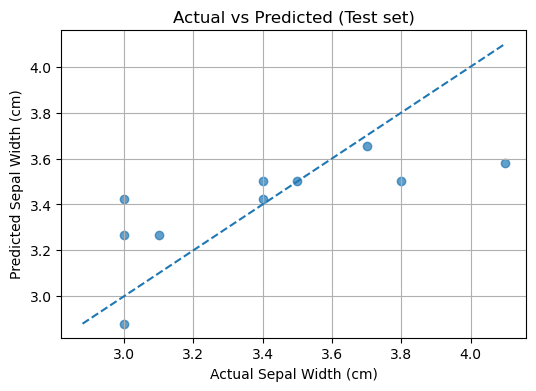

In [20]:
# Plot Actual vs Predicted for test set
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_test, alpha=0.7)
minv, maxv = min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())
plt.plot([minv, maxv], [minv, maxv], linestyle='--')
plt.xlabel('Actual Sepal Width (cm)')
plt.ylabel('Predicted Sepal Width (cm)')
plt.title('Actual vs Predicted (Test set)')
plt.grid(True)
plt.show()